C:\Users\Sudarshan Gogoi\anaconda3\lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


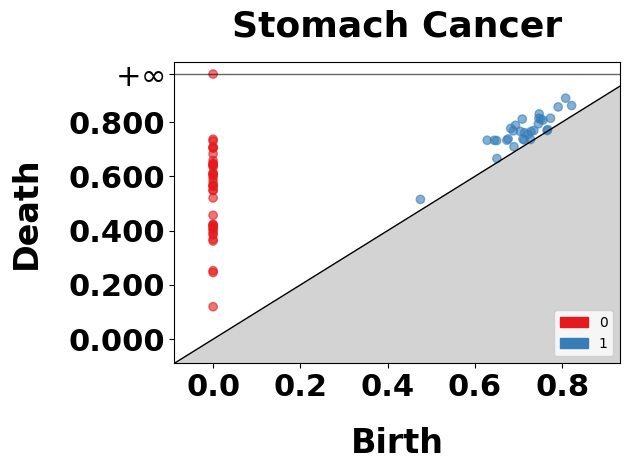

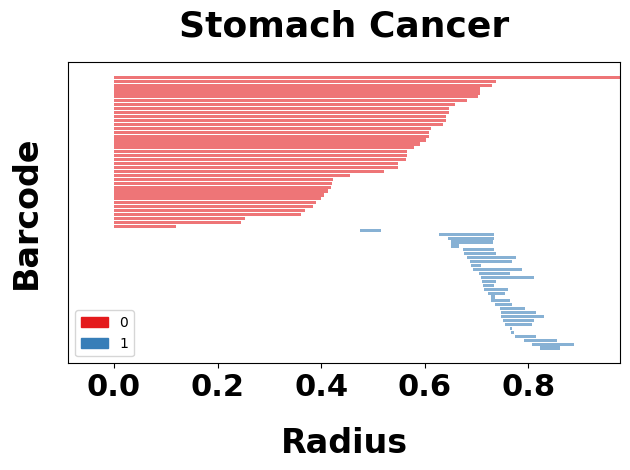

0-Dimensional Hole Minimum Life Range: 0.11958078877529199
0-Dimensional Hole Maximum Life Range: 0.7367223340763223
Range of Death Values for 0-Dimensional Holes: 0.6171415453010303
Number of 0-Dimensional Holes: 39
Median Death (0D): 0.5654409858338472
Standard Deviation of Death (0D): 0.14701138426427274
Range of Death (0D): 0.6171415453010303
Average Death (0D): 0.5291416383938093
1-Dimensional Hole Maximum Life Range: 0.10500415624687642
Average Birth (1D): 0.7123872510310549
Average Death (1D): 0.7657886032303508
Number of 1-Dimensional Holes: 31


In [1]:
# This code presents the topological data analysis(TDA) results for different cancer types based on different patients' biomarker concentrations obtained from blood tests 
# It includes the characterization of different tumor types based on TDA features and dissimilarity percentages among their statistics
# This code evaluates the effectiveness of topological features in identifying significant characteristics that differentiate various tumors.
# Data file used: "clinical cancer classification data separated.xlsx"
# Example data type used: "Stomach cancer"
# The code is being executed in "jupyter" Notebook version 7.0.8 within Anaconda Navigator

# Import libraries
import pandas as pd
import numpy as np
from ripser import Rips
from ripser import ripser
import matplotlib.pyplot as plt
import gudhi
import csv
import math

# Step 1: Load the clinical data "clinical cancer classification data separated.xlsx" separated into different cancer types
# Provide the clinical data file path and sheet name
file_path = r'D:/Cancer Detection folder/Characterization/clinical cancer classification data separated.xlsx'
sheet_name = 'Stomach'  # Provide the data sheet name from the file to select the required data type(E.g.: Normal, Breast, etc) for analysis
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Step 2: Log Normalization
# Select only numeric columns for log Normalization
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Log Normalize the numeric columns
df[numeric_cols] = np.log(df[numeric_cols])
# step 3: Select the specific columns from the sheet containing the 39 biomarkers for analysis
df_subset = df.iloc[:, 4:43]  # iloc is used for integer-location based indexing
# Save the column names for later use
column_names = df_subset.columns.tolist()
# Remove column names
df_subset = df_subset.values  # Convert DataFrame to numpy array without column names
# Step 4: Calculate Pearson correlation matrix
corr_matrix = np.corrcoef(df_subset, rowvar=False)
# Create a DataFrame from the correlation matrix with column names
corr_matrix_df = pd.DataFrame(corr_matrix, columns=column_names, index=column_names)
# Convert the correlation matrix into distance matrix
distance_matrix =1-np.abs(corr_matrix_df)
# Convert DataFrame to NumPy array
distance_matrix_np = distance_matrix.values
#Step 5: Construct a simplicial complex
rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix_np)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
# Compute persistence homology
persistence = simplex_tree.persistence()
# Plot Persistence Diagram
gudhi.plot_persistence_diagram(persistence)
plt.xlabel("Birth", fontsize=24, fontweight='bold', labelpad=18)
plt.ylabel("Death", fontsize=24, fontweight='bold', labelpad=18)
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.title("Stomach Cancer", fontsize=26, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()
# Plot Persistence Barcode
gudhi.plot_persistence_barcode(persistence)
plt.xlabel("Radius", fontsize=24, fontweight='bold', labelpad=18)
plt.ylabel("Barcode", fontsize=24, fontweight='bold', labelpad=18)
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.title("Stomach Cancer", fontsize=26, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()
# Step 6: Extract Topological Features
# Filter out tuples with infinite death values
finite_persistence = [(dim, (birth, death)) for dim, (birth, death) in persistence if death != float('inf')]
# Step 6(a): Generate 1th Betti numbers curve plot
def plot_1th_betti_curve(finite_persistence):
    # Filter persistence pairs for 1-dimensional holes
    one_dim_holes = [(birth, death) for dim, (birth, death) in finite_persistence if dim == 1]    
    # Check if there are any 1-dimensional holes
    if one_dim_holes:
        # Calculate number of intervals with life range greater than radiuses for 1-dimensional holes
        radiuses = np.arange(0, 0.25, 0.015)
        intervals_greater_than_radius = []
        for radius in radiuses:
            intervals_greater_than_radius.append(sum(1 for birth, death in one_dim_holes if (death - birth) > radius))
        plt.figure(figsize=(16, 18), dpi=600)
        plt.plot(radiuses, intervals_greater_than_radius, marker='o', markersize=13, linewidth=6)  # increased line width and marker size
        plt.title("Stomach Cancer", fontsize=58, fontweight='bold', pad=26)
        plt.xlabel('Radius', fontsize=56, fontweight='bold', labelpad=26)
        plt.ylabel('Number of 1-Dimensional Holes', fontsize=56, fontweight='bold', labelpad=26)
        plt.yticks(np.arange(0, max(intervals_greater_than_radius) + 1, 3), fontsize=54, fontweight='bold')
        plt.xticks(fontsize=54, fontweight='bold')
        plt.grid(True)
        # Adjust layout to prevent clipping of labels
        plt.tight_layout()
        # Finding x-intercept
        x_intercept = None
        for i, num_holes in enumerate(intervals_greater_than_radius):
            if num_holes == 0:
                x_intercept = radiuses[i]
                break
        # Round x-intercept to 3 decimal places
        if x_intercept is not None:
            x_intercept = round(x_intercept, 3)
        # Add text for x-intercept on top-right corner
        plt.text(0.68, 0.9, f'X-intercept: {x_intercept}', fontweight='bold', horizontalalignment='center',
                 verticalalignment='center', transform=plt.gca().transAxes, fontsize=54, bbox=dict(facecolor='white', alpha=0.5))         
        # Show the plot
        plt.show()
plot_1th_betti_curve(finite_persistence)
# Filter persistence pairs for 1-dimensional holes
one_dim_holes = [(birth, death) for dim, (birth, death) in finite_persistence if dim == 1]
# Step 6(b): Extract statistics of the topological features
# Check if there are any 1-dimensional holes
if one_dim_holes:
    # Extract birth and death values from the filtered persistence pairs for 1-dimensional holes
    birth_values_1D = [birth for birth, _ in one_dim_holes]
    death_values_1D = [death for _, death in one_dim_holes]
    # Calculate maximum life range for 1-dimensional holes
    max_life_range_1D = max(death - birth for birth, death in one_dim_holes)
    # Calculate average birth and average death for 1-dimensional holes
    avg_birth_1D = np.mean(birth_values_1D)
    avg_death_1D = np.mean(death_values_1D)
    # Calculate the number of 1-dimensional holes
    num_one_dim_holes = len(one_dim_holes)
else:
    max_life_range_1D = 0
    avg_birth_1D = 0
    avg_death_1D = 0
    num_one_dim_holes = 0
# Filter persistence pairs for 0-dimensional holes
zero_dim_holes = [(birth, death) for dim, (birth, death) in finite_persistence if dim == 0]
# Extract birth and death values from the filtered persistence pairs
birth_values_0D = [birth for birth, _ in zero_dim_holes]
death_values_0D = [death for _, death in zero_dim_holes]
# Calculate minimum and maximum life range for 0-dimensional holes
min_life_range_0D = min(death - birth for birth, death in zero_dim_holes)
max_life_range_0D = max(death - birth for birth, death in zero_dim_holes)
# Calculate range of death values
range_death_0D = max(death_values_0D) - min(death_values_0D)
# Calculate average death for 0-dimensional holes
avg_death_0D = np.mean(death_values_0D)
# Calculate the number of 0-dimensional holes
num_zero_dim_holes = len(zero_dim_holes) + 1
# Additional metrics for 0-dimensional holes
median_death_0D = np.median(death_values_0D)
std_death_0D = np.std(death_values_0D)
# Prepare the formatted output
formatted_output = [
    ["0-Dimensional Hole Minimum Life Range", min_life_range_0D],
    ["0-Dimensional Hole Maximum Life Range", max_life_range_0D],
    ["Range of Death Values for 0-Dimensional Holes", range_death_0D],
    ["Number of 0-Dimensional Holes", num_zero_dim_holes],
    ["Median Death (0D)", median_death_0D],
    ["Standard Deviation of Death (0D)", std_death_0D],
    ["Range of Death (0D)", range_death_0D],
    ["Average Death (0D)", avg_death_0D],
    ["1-Dimensional Hole Maximum Life Range", max_life_range_1D],
    ["Average Birth (1D)", avg_birth_1D],
    ["Average Death (1D)", avg_death_1D],
    ["Number of 1-Dimensional Holes", num_one_dim_holes],
]
# Print the formatted output
for row in formatted_output:
    print(f"{row[0]}: {row[1]}")

In [2]:
# All the statistics of the topological features of normal and different cancer types are associated in the Table 1 sheet of "clinical cancer classification data separated.xlsx" 
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Step 7: Dissimilarity calculation between the topological features of normal and different cancer types
# Provide the clinical data file path and sheet name
file_path = r'D:/Cancer Detection folder/Characterization/clinical cancer classification data separated.xlsx'
sheet_name = 'Table 2'
df = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)
# Calculate RMSE between each data type
data_types = df.columns
# Initialize an empty dictionary to store RMSE values between each pair of data types
rmse_results = {}
# Calculate RMSE between each pair of cancer types
for i, col1 in enumerate(data_types):
    for j, col2 in enumerate(data_types):
        if i < j:  # Avoid redundant calculations
            rmse = np.sqrt(mean_squared_error(df[col1], df[col2]))
            rmse_results[f'{col1} vs {col2}'] = rmse
# Find the maximum RMSE
max_rmse = max(rmse_results.values())
# Calculate dissimilarity percentages
dissimilarity_results = {pair: (rmse / max_rmse) * 100 for pair, rmse in rmse_results.items()}
# Display the RMSE and dissimilarity percentage results
print("RMSE Results:")
for comparison, rmse in rmse_results.items():
    print(f'{comparison}: RMSE = {rmse}')
print("\nDissimilarity Percentages:")
for comparison, dissimilarity in dissimilarity_results.items():
    print(f'{comparison}: Dissimilarity = {dissimilarity:.2f}%')

RMSE Results:
Normal vs Breast Cancer: RMSE = 0.08681745616143897
Normal vs Colorectum Cancer: RMSE = 0.09700015206517053
Normal vs Esophagus Cancer: RMSE = 0.11386990908993656
Normal vs Liver Cancer: RMSE = 0.17243488072649768
Normal vs Lung Cancer: RMSE = 0.05988549427034917
Normal vs Ovary Cancer: RMSE = 0.13157968546740564
Normal vs Pancreas Cancer: RMSE = 0.13859292858850608
Normal vs Stomach Cancer: RMSE = 0.0898254966497655
Breast Cancer vs Colorectum Cancer: RMSE = 0.03549271549029193
Breast Cancer vs Esophagus Cancer: RMSE = 0.08438548505859965
Breast Cancer vs Liver Cancer: RMSE = 0.09699212419965855
Breast Cancer vs Lung Cancer: RMSE = 0.05886593186887505
Breast Cancer vs Ovary Cancer: RMSE = 0.05514571298454559
Breast Cancer vs Pancreas Cancer: RMSE = 0.065965341835336
Breast Cancer vs Stomach Cancer: RMSE = 0.10009876191327854
Colorectum Cancer vs Esophagus Cancer: RMSE = 0.11094548640001468
Colorectum Cancer vs Liver Cancer: RMSE = 0.09436512060564406
Colorectum Cancer vs